In [1]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pdfminer.six

Defaulting to user installation because normal site-packages is not writeable


## To extract content from a PDF and save it as a text file

In [3]:
from pdfminer.high_level import extract_text

def extract_text_from_pdf_with_pdfminer(pdf_path):
    text = extract_text(pdf_path)
    return text

def save_text_to_file(text, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(text)

pdf_path = r'D:\DeepLearningonepage.pdf'
text = extract_text_from_pdf_with_pdfminer(pdf_path)

output_txt_path = r'D:\DeepLearningonepage.txt'
save_text_to_file(text, output_txt_path)

## To read a text file with GPT-4 and identify formulas, presenting them in LaTeX format

In [4]:
import openai

# set up an OpenAI API key, follow these steps
# we use a string of numbers instead of our used key just for safety
openai.api_key = "0123456789"

## Txt Recognizer

In [5]:
class TxtRecognizer:
    def __init__(self, model="gpt-4-0613", result_length=2048, with_prices=True):
        self.model = model
        self.with_prices = with_prices
        self.result_length = result_length

    def process(self, query: str, example_text: str):
        # Construct conversational prompts
        prompt = f"{example_text}\n\nQuestion: {query}\nAnswer:"

        # Generate responses using the Chat Completion interface
        response = openai.ChatCompletion.create(
            model=self.model,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=self.result_length,
            temperature=0.7
        )

        # Extract responses
        answer = response.choices[0].message['content'] if response.choices else "No answer available."
        return answer

# read the content of txt file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# the path of txt file
txt_file_path = 'D:\DeepLearningonepage.txt'
example_text = read_text_from_file(txt_file_path)

# text the query
query = "Based on the content of example_text, please identify all the formulas and change them into latex format. Then show me the new content."
txt_recognizer = TxtRecognizer()

print(f"\nQuery: {query}")
new_text = txt_recognizer.process(query, example_text)
print(f"New_Text: {new_text}")


Query: Based on the content of example_text, please identify all the formulas and change them into latex format. Then show me the new content.
New_Text: The text with the formulas in latex format is as follows:

2.1. Warm up: a fast matrix-based approach to computing the output from a neural network

41

\[j = \sigma \left(\sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j}\right)\]

where the sum is over all neurons k in the (l-1)-th layer. To rewrite this expression in a matrix form we define a weight matrix \(w^{l}\) for each layer, l. The entries of the weight matrix \(w^{l}\) are just the weights connecting to the l-th layer of neurons, that is, the entry in the j-th row and k-th column is \(w^{l}_{jk}\). Similarly, for each layer l we define a bias vector, \(b^{l}\). You can probably guess how this works – the components of the bias vector are just the values \(b^{l}_{j}\), one component for each neuron in the l-th layer. And finally, we define an activation vector \(a^{l}\) whose compo

## TeacherAssistant

In [51]:
class TeacherAssistant:
    def __init__(self, model="gpt-4-0613", result_length=500):
        self.model = model
        self.result_length = result_length

    def generate_questions(self, text, num_questions=14):
        messages = [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"Based on the following text, generate {num_questions} relevant exam questions:\n\n{text}"}
        ]

        response = openai.ChatCompletion.create(
            model=self.model,
            messages=messages,
            max_tokens=self.result_length,
            temperature=0.7
        )

        questions = response.choices[0].message['content'] if response.choices else "No questions available."
        return questions

# the original text
example_text = new_text

# test TeacherAssistant class
teacher_assistant = TeacherAssistant()

# generate the questions
generated_questions = teacher_assistant.generate_questions(example_text)
print(f"Generated Questions:\n{generated_questions}")

Generated Questions:
1. What is the function of the weight matrix \(w^{l}\) in a neural network?
2. How is the bias vector \(b^{l}\) defined for each layer in a neural network?
3. What is the role of the activation vector \(a^{l}\) in a neural network?
4. Explain the concept of vectorizing a function such as \(\sigma\) in the context of neural networks.
5. How can you apply the function \(f(x) = x^{2}\) to a vector in a vectorized form?
6. How can Equation 2.1 be rewritten in a vectorized form?
7. What is the global way of thinking about how the activations in one layer relate to activations in the previous layer of a neural network?
8. How is the "weighted input" \(z^{l}\) defined in the context of a neural network?
9. How is Equation 2.3 sometimes written in terms of the weighted input?
10. What is the significance of the notation \(z^{l}_{j}\) in the context of a neural network?
11. Why is the \(w^{l}_{jk}\) notation used instead of using j to index the input neuron and k to index t

## similarity of questions

In [52]:
from transformers import BertTokenizer, BertModel
import torch

# Check the relativity between the text generated by GPT-4-0613 and original material content
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare text
question_by_GPT4 =generated_questions

question_from_text = new_text
texts = [question_from_text, question_by_GPT4]

# encode text
encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute the similarity
cosine_similarity_ques_GPT4 = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ques_GPT4)

tensor([0.9436])


## Student Assistant

In [53]:
import openai

class StudentAssistant:
    def __init__(self, model="gpt-4-0613", result_length=500, with_prices=True):
        self.model = model
        self.with_prices = with_prices
        self.result_length = result_length

    def process(self, query: str, example_text: str):
        # Construct conversational prompts
        prompt = f"{example_text}\n\nQuestion: {query}\nAnswer:"

        # Generate responses using the Chat Completion interface
        response = openai.ChatCompletion.create(
            model=self.model,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=self.result_length,
            temperature=0.7
        )

        # Extract responses
        answer = response.choices[0].message['content'] if response.choices else "No answer available."
        return answer

# the original text
example_text = new_text

# Split the generated question string into a separate list of questions
generated_questions_list = generated_questions.split('\n')

# Remove empty strings
generated_questions_list = [q for q in generated_questions_list if q]

# test query
queries = generated_questions_list
student_assistant = StudentAssistant()
all_ans = ''
for i, query in enumerate(queries):
    print(f"\nQuery[{i + 1}]: {query}")
    answer = student_assistant.process(query, example_text)
    all_ans += answer
    print(f"Answer: {answer}")


Query[1]: 1. What is the function of the weight matrix \(w^{l}\) in a neural network?
Answer: The weight matrix \(w^{l}\) in a neural network plays a crucial role in determining the output of the network. Each entry in the weight matrix, \(w^{l}_{jk}\), represents the weight connecting the k-th neuron in the (l-1)-th layer to the j-th neuron in the l-th layer. The weight matrix is used to apply these weights to the activations from the previous layer. When calculating the activations for the current layer, the weight matrix is multiplied with the activation vector from the previous layer. This operation is part of the process that transforms the input data within the network to produce the final output. In other words, the weight matrix helps to control how much influence each input (from the previous layer's neurons) has on the next layer's neurons. The weight matrices are typically initialized randomly and are adjusted during the learning process to improve the performance of the ne

## similarity of answers

In [54]:
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare the text
text3 = all_ans
text4 = new_text

texts = [text3, text4]

# encode the text
encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute the similarity
cosine_similarity_ans_GPT4 = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ans_GPT4)

tensor([0.9036])


## Generate questions and answers using GPT-3.5, and compute semantic relevance under the GPT-3.5 model

## Generate questions & calculate semantic relevance between text and questions

In [55]:
class TeacherAssistantGPT3:
    def __init__(self, model="text-davinci-003", result_length=500):
        self.model = model
        self.result_length = result_length

    def generate_questions(self, text, num_questions=14):
        prompt = f"Based on the following text, generate {num_questions} relevant exam questions:\n\n{text}"
        
        response = openai.Completion.create(
            model=self.model,
            prompt=prompt,
            max_tokens=self.result_length,
            temperature=0.7
        )
        
        questions = response.choices[0].text.strip() if response.choices else "No questions available."
        return questions

# the original text
example_text = new_text

# test TeacherAssistant class
teacher_assistant = TeacherAssistantGPT3()

# generate the questions
generated_questionsGPT3 = teacher_assistant.generate_questions(example_text)
print(f"Generated Questions:\n{generated_questionsGPT3}")

Generated Questions:
So instead, we use k to index the input neuron, and j to index the output neuron.

Exam Questions:

1. What does the expression \(\sigma (v)\) denote?
2. What is the difference between the neuron-by-neuron view and the global view of computing the output from a neural network?
3. What is the purpose of the bias vector \(b^{l}\)?
4. What is the purpose of the weight matrix \(w^{l}\)?
5. How does the vectorized form of f work?
6. What is the notation used for the weighted input to the neurons in layer l?
7. What is the effect of vectorizing a function such as \(\sigma\)?
8. How is Equation 2.1 rewritten in a matrix form?
9. What do the components of the bias vector represent?
10. What does the expression \(a^{l-1}_{k}\) denote?
11. What does the expression \(w^{l}_{jk}\) denote?
12. What does the expression \(a^{l}_{j}\) denote?
13. What is the difference between the components of \(a^{l}\) and \(b^{l}\)?
14. What is the purpose of the activation vector \(a^{l}\)?


In [56]:
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare the text
question_by_GPT3 =generated_questionsGPT3

text = new_text
texts = [question_by_GPT3, text]

# encode text
encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute similarity
cosine_similarity_ques_GPT3 = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ques_GPT3)

tensor([0.8699])


## Generate answers & calculate semantic relevance between text and answers

In [57]:
import openai

class StudentAssistantGPT3:
    def __init__(self, model="text-davinci-003", result_length=500, with_prices=True):
        self.model = model
        self.result_length = result_length

    def process(self, query: str, example_text: str):
        # Construct conversational prompts
        prompt = f"{example_text}\n\nQuestion: {query}\nAnswer:"

        # Generate responses using the Completion interface
        response = openai.Completion.create(
            model=self.model,
            prompt=prompt,
            max_tokens=self.result_length,
            temperature=0.7
        )

        # Extract responses
        answer = response.choices[0].text.strip() if response.choices else "No answer available."

        return answer

example_text = new_text

# Split the generated question string into a separate list of questions
generated_questions_list = generated_questionsGPT3.split('\n')

# Remove empty strings
generated_questions_list = [q for q in generated_questions_list if q]

# test query
queries = generated_questions_list
student_assistant = StudentAssistantGPT3()
all_ansGPT3 = ''
for i, query in enumerate(queries):
    print(f"\nQuery[{i + 1}]: {query}")
    answer = student_assistant.process(query, example_text)
    all_ansGPT3 += answer
    print(f"Answer: {answer}")


Query[1]: So instead, we use k to index the input neuron, and j to index the output neuron.
Answer: This allows us to use the weight matrix directly in Equation 2.3 without needing to take the transpose, and also makes it easier to think of the weight matrix as connecting input neurons to output neurons.

Query[2]: Exam Questions:
Answer: 1. What is the formula for computing the output from a neural network?
Answer: The formula is \(j = \sigma \left(\sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j}\right)\)

2. What is the vectorized form of this equation?
Answer: The vectorized form of the equation is \(a^{l} = \sigma(w^{l} a^{l-1} + b^{l})\)

Query[3]: 1. What does the expression \(\sigma (v)\) denote?
Answer: The expression \(\sigma (v)\) denotes the element-wise application of a function to a vector, such that the components of \(\sigma(v)\) are just \(\sigma(v)_{j} = \sigma(v_{j})\).

Query[4]: 2. What is the difference between the neuron-by-neuron view and the global view of computing

In [58]:
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare the text
ansGPT3 = all_ansGPT3
text = new_text

texts = [new_text, ansGPT3]

# encode text
encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute similarity
cosine_similarity_ans_GPT3 = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ans_GPT3)

tensor([0.9752])


## The chart of comparison

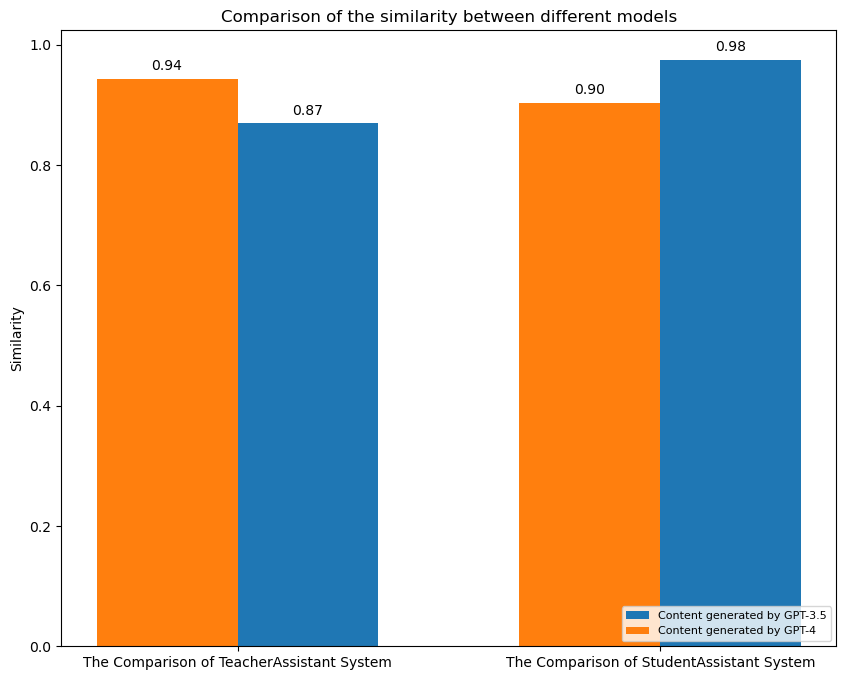

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' 

# data
ans_tensor_GPT4 = cosine_similarity_ans_GPT4[0].item()
ans_tensor_GPT3 = cosine_similarity_ans_GPT3[0].item()
ques_tensor_GPT4 = cosine_similarity_ques_GPT4[0].item()
ques_tensor_GPT3 = cosine_similarity_ques_GPT3[0].item()

group_te = [ques_tensor_GPT3, ans_tensor_GPT3]
group_stu = [ques_tensor_GPT4, ans_tensor_GPT4]

labels = ['The Comparison of TeacherAssistant System', 'The Comparison of StudentAssistant System']

# Set the position of the bar chart
x = np.arange(len(labels)) * 0.6  # the position of label
width = 0.2  # width of chart

# Create a bar chart
fig, ax = plt.subplots(figsize=(10,8))
rects_te = ax.bar(x + width/2, group_te, width, label='Content generated by GPT-3.5')
rects_stu = ax.bar(x - width/2, group_stu, width, label='Content generated by GPT-4')
for rect in rects_te + rects_stu:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 1.01*height, f'{height:.2f}', ha='center', va='bottom')

# Add titles and labels
ax.set_ylabel('Similarity')
ax.set_title('Comparison of the similarity between different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=8, loc='lower right')
plt.show()

## We choose another page with many formulas to test our system

In [60]:
pdf_path = r'D:\manyformula.pdf'
text = extract_text_from_pdf_with_pdfminer(pdf_path)

output_txt_path = r'D:\manyformula.txt'
save_text_to_file(text, output_txt_path)

In [61]:
# the path of txt file
txt_file_path = 'D:\manyformula.txt'
example_text_formula = read_text_from_file(txt_file_path)

# text the query
query = "Based on the content of example_text, please identify all the formulas and change them into latex format. Then show me the new content."
txt_recognizer = TxtRecognizer()

print(f"\nQuery: {query}")
new_text_formula = txt_recognizer.process(query, example_text_formula)
print(f"New_Text: {new_text_formula}")


Query: Based on the content of example_text, please identify all the formulas and change them into latex format. Then show me the new content.
New_Text: The content with formulas in latex format is as follows:

We’ll now prove the four fundamental equations (BP1)–(BP4). All four are consequences of the chain rule from multivariable calculus. If you’re comfortable with the chain rule, then I strongly encourage you to attempt the derivation yourself before reading on.

Let’s begin with Equation (BP1), which gives an expression for the output error, $\delta^l_j$. To prove this equation, recall that by definition

$\delta^L_j = \frac{\partial C}{\partial z^L_j}$ (2.14)

Applying the chain rule, we can re-express the partial derivative above in terms of partial derivatives with respect to the output activations,

$\delta^L_j = \sum_k \frac{\partial C}{\partial a^L_k} \frac{\partial a^L_k}{\partial z^L_j}$ (2.15)

where the sum is over all neurons k in the output layer. Of course, the outpu

## Generated questions and answers by GPT-4 model

In [71]:
# the original text
example_text_formula = new_text_formula

# test TeacherAssistant class
teacher_assistant_formula = TeacherAssistant()

# generate the questions
generated_questions_formula = teacher_assistant_formula.generate_questions(example_text_formula)
print(f"Generated Questions:\n{generated_questions_formula}")

Generated Questions:
1. What are the four fundamental equations (BP1)–(BP4) that we are trying to prove?
2. How does the chain rule from multivariable calculus apply to these equations?
3. What is the expression for the output error, $\delta^l_j$, given by Equation (BP1)?
4. How is the chain rule used to re-express the partial derivative $\frac{\partial C}{\partial z^L_j}$?
5. Explain the terms of the equation $\delta^L_j = \sum_k \frac{\partial C}{\partial a^L_k} \frac{\partial a^L_k}{\partial z^L_j}$.
6. How does the output activation $a^L_k$ of the k-th neuron depend on the weighted input $z^L_j$ for the j-th neuron?
7. Why does $\frac{\partial a^L_k}{\partial z^L_j}$ vanish when k ≠ j?
8. What does the equation $\delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j)$ represent?
9. What is the aim of proving (BP2)?
10. How can we rewrite $\delta^l_j = \frac{\partial C}{\partial z^l_j}$ in terms of $\delta^{l+1}_k = \frac{\partial C}{\partial z^{l+1}_k}$?
11. How can we get fr

In [72]:
# the original text
example_text_formula = new_text_formula

# Split the generated question string into a separate list of questions
generated_questions_list_formula = generated_questions_formula.split('\n')

# Remove empty strings
generated_questions_list_formula = [q for q in generated_questions_list_formula if q]

# test query
queries_formula = generated_questions_list_formula
student_assistant_formula = StudentAssistant()
all_ans_formula = ''
for i, query in enumerate(queries_formula):
    print(f"\nQuery[{i + 1}]: {query}")
    answer_formula = student_assistant_formula.process(query, example_text_formula)
    all_ans_formula += answer_formula
    print(f"Answer: {answer_formula}")


Query[1]: 1. What are the four fundamental equations (BP1)–(BP4) that we are trying to prove?
Answer: The text does not provide specific details on the four fundamental equations (BP1)–(BP4) that are being proven. The context suggests they are related to backpropagation in neural networks and involve the application of the chain rule from multivariable calculus. Two of the equations are referenced during the discussion: (BP1) seems to concern the expression for the output error, $\delta^l_j$, and (BP2) appears to be about the equation for the error $\delta^l_j$ in terms of the error in the next layer, $\delta^{l+1}_j$. However, the actual forms of equations (BP3) and (BP4) are not provided in the given text.

Query[2]: 2. How does the chain rule from multivariable calculus apply to these equations?
Answer: The chain rule from multivariable calculus is applied throughout these equations in order to derive new formulas or to simplify existing ones. 

1. In equation (2.14), the chain rul

## Calculate the similarity of questions and answers

In [73]:
# Check the relativity between the text generated by GPT-4-0613 and original textbook content
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare text
question_by_GPT4_formula =generated_questions_formula

question_from_text_formula = new_text_formula
texts_formula = [question_from_text_formula, question_by_GPT4_formula]

# encode text
encoded_input = tokenizer(texts_formula, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute the similarity
cosine_similarity_ques_GPT4_formula = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ques_GPT4_formula)

tensor([0.9707])


In [74]:
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare the text
texts_formula = [all_ans_formula, new_text_formula]

# encode the text
encoded_input = tokenizer(texts_formula, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute the similarity
cosine_similarity_ans_GPT4_formula = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ans_GPT4_formula)

tensor([0.9627])


## Generated questions and answers by GPT-3.5 model and calculate similarity respectively

In [75]:
# the original text
example_text_formula = new_text_formula

# test TeacherAssistant class
teacher_assistant_formula = TeacherAssistantGPT3()

# generate the questions
generated_questionsGPT3_formula = teacher_assistant_formula.generate_questions(example_text)
print(f"Generated Questions:\n{generated_questionsGPT3_formula}")

Generated Questions:
Exam Questions:

1. What does the expression \(\sigma(v)\) denote?
2. What is the effect of applying the vectorized form of the function \(f (x) = x^{2}\) to the vector \(\begin{matrix} 2 \\ 3 \end{matrix}\)?
3. What is the purpose of defining a weight matrix \(w^{l}\) for each layer, l?
4. What is the purpose of defining a bias vector \(b^{l}\) for each layer, l?
5. What is the purpose of defining an activation vector \(a^{l}\) for each layer, l?
6. How does Equation 2.1 differ from the matrix form?
7. What is the quirk in the \(w^{l}_{jk}\) notation?
8. What is the purpose of computing the intermediate quantity \( z^{l-1} \equiv w^{l} a^{l-1} + b^{l}\)?
9. What is the difference between the neuron-by-neuron view and the global view of computing the activations in a layer?
10. How is the expression \(a^{l} = \sigma(w^{l} a^{l-1} + b^{l})\) useful in practice?
11. What is the purpose of Equation 2.3?
12. What is the effect of the vectorized form of the function \(f

In [76]:
# Check the relativity between the text generated by GPT-3.5 and original textbook content
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare the text
question_by_GPT3_formula =generated_questionsGPT3_formula

text_formula = new_text_formula
texts = [question_by_GPT3_formula, text_formula]

# encode text
encoded_input = tokenizer(texts_formula, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute similarity
cosine_similarity_ques_GPT3_formula = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ques_GPT3_formula)

tensor([0.9627])


In [77]:
example_text_formula = new_text_formula

# Split the generated question string into a separate list of questions
generated_questions_list_formula = generated_questionsGPT3_formula.split('\n')

# Remove empty strings
generated_questions_list_formula = [q for q in generated_questions_list_formula if q]

# test query
queries_formula = generated_questions_list_formula
student_assistant_formula = StudentAssistantGPT3()
all_ansGPT3_formula = ''
for i, query in enumerate(queries_formula):
    print(f"\nQuery[{i + 1}]: {query}")
    answer_formula = student_assistant_formula.process(query, example_text_formula)
    all_ansGPT3_formula += answer_formula
    print(f"Answer: {answer_formula}")


Query[1]: Exam Questions:
Answer: Substituting this into the previous equation, we get

$\delta^l_j = \sum_k \delta^{l+1}_k w^{l+1}_{kj} \sigma'(z^l_j)$ (2.21)

which is just (BP2).

Query[2]: 1. What does the expression \(\sigma(v)\) denote?
Answer: The expression \(\sigma(v)\) denotes an activation function, which is used to map a weighted sum of inputs (v) to an output.

Query[3]: 2. What is the effect of applying the vectorized form of the function \(f (x) = x^{2}\) to the vector \(\begin{matrix} 2 \\ 3 \end{matrix}\)?
Answer: The effect of applying the vectorized form of the function f(x) = x2 to the vector (2, 3) is to calculate the squares of both numbers, resulting in (4, 9).

Query[4]: 3. What is the purpose of defining a weight matrix \(w^{l}\) for each layer, l?
Answer: The purpose of defining a weight matrix \(w^{l}\) for each layer, l is to enable the neural network to learn the best parameters for the model, thus optimizing the output of the model for a given input. The 

In [78]:
# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# prepare the text
ansGPT3_formula = all_ansGPT3_formula
text_formula = new_text_formula

texts_formula = [new_text_formula, ansGPT3_formula]

# encode text
encoded_input = tokenizer(texts_formula, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# Extract features from the embedding layer
embeddings = model_output.last_hidden_state.mean(dim=1)

# compute similarity
cosine_similarity_ans_GPT3_formula = torch.nn.functional.cosine_similarity(embeddings[0].unsqueeze(0), embeddings[1].unsqueeze(0))
print(cosine_similarity_ans_GPT3_formula)

tensor([0.9326])


## Plot the comparison figure for page with many formulas

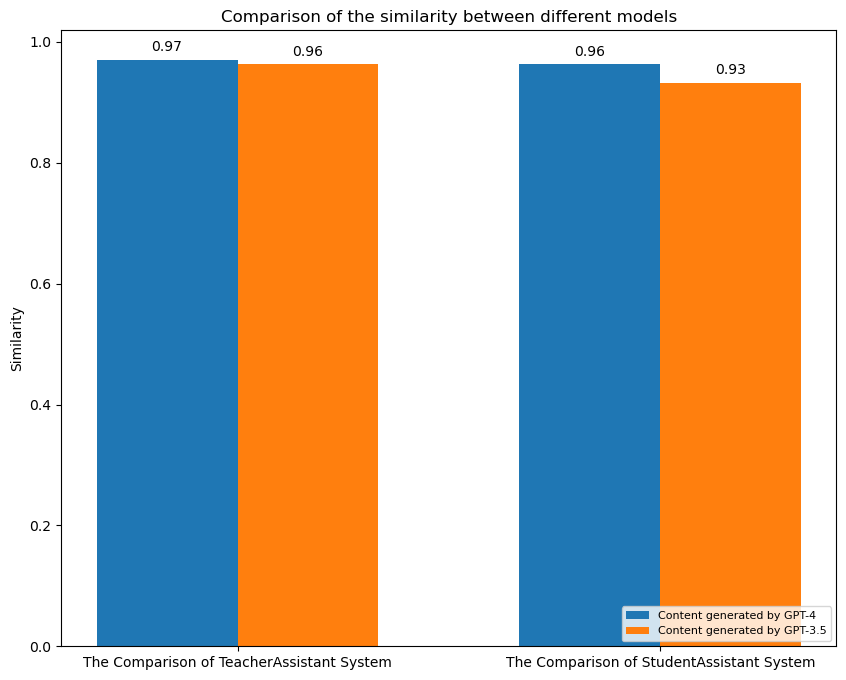

In [79]:
# data
ans_tesor_GPT4_formula = cosine_similarity_ans_GPT4_formula[0].item()
ans_tensor_GPT3_formula = cosine_similarity_ans_GPT3_formula[0].item()
ques_tensor_GPT4_formula = cosine_similarity_ques_GPT4_formula[0].item()
ques_tensor_GPT3_formula = cosine_similarity_ques_GPT3_formula[0].item()

group_ans_formula = [ques_tensor_GPT3_formula, ans_tensor_GPT3_formula]
group_ques_formula = [ques_tensor_GPT4_formula, ans_tesor_GPT4_formula]

labels = ['The Comparison of TeacherAssistant System', 'The Comparison of StudentAssistant System']

# Set the position of the bar chart
x = np.arange(len(labels)) * 0.6  # the position of label
width = 0.2  # width of chart

# Create a bar chart
fig, ax = plt.subplots(figsize=(10,8))
rects1_formula = ax.bar(x - width/2, group_ques_formula, width, label='Content generated by GPT-4')
rects2_formula = ax.bar(x + width/2, group_ans_formula, width, label='Content generated by GPT-3.5')
for rect in rects1_formula + rects2_formula:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 1.01*height,
            f'{height:.2f}', ha='center', va='bottom')

# Add titles and labels
ax.set_ylabel('Similarity')
ax.set_title('Comparison of the similarity between different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=8, loc='lower right')
plt.show()